# 📦 Food Delivery Time Prediction

This Jupyter notebook covers data preprocessing, visualization, and predictive modeling using Linear and Logistic Regression to estimate delivery time and classify orders as fast or delayed.


## 📊 Phase 1: Data Collection & Preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("Food_Delivery_Time_Prediction.csv")
df.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34


### ✅ Handle Missing Values

In [5]:
df.isnull().sum()  # Check missing
df = df.dropna()  # Drop missing for simplicity

### 🧠 Encode Categorical Variables

In [4]:
label_cols = ['Weather_Conditions', 'Traffic_Conditions', 'Vehicle_Type', 'Order_Priority', 'Order_Time']
df[label_cols] = df[label_cols].apply(LabelEncoder().fit_transform)
df.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,1,2,4,2,0,2,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,0,2,8,1,3,2,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,2,2,9,0,3,1,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,0,1,2,2,1,1,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,1,0,6,1,3,1,3.5,2.8,32.38,619.81,2.34


### ⚙️ Normalize Numeric Columns

In [6]:
scaler = StandardScaler()
num_cols = ['Distance', 'Order_Cost', 'Tip_Amount', 'Restaurant_Rating', 'Customer_Rating']
df[num_cols] = scaler.fit_transform(df[num_cols])
df.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",-1.454738,1,2,4,2,0,2,0.515500,-0.987317,26.22,0.501852,1.192403
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",1.439192,0,2,8,1,3,2,1.085900,0.738511,62.61,-1.634294,-0.600810
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",-0.666417,2,2,9,0,3,1,-0.625302,-0.412041,48.43,1.092646,0.599332
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",0.335835,0,1,2,2,1,1,-0.767902,0.019416,111.63,-0.923323,1.113532
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",-0.700119,1,0,6,1,3,1,-0.340101,-1.274955,32.38,-0.779755,-1.511757


## 📈 Descriptive Statistics

In [7]:
df.describe()

,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
count,2.000000e+02,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,2.000000e+02,2.000000e+02,200.000000,2.000000e+02,2.000000e+02
mean,-1.643130e-16,1.560000,1.085000,5.250000,1.045000,1.350000,0.965000,3.463896e-16,4.529710e-16,70.494950,-2.042810e-16,-4.440892e-18
std,1.002509e+00,1.096546,0.768589,2.745027,0.791268,1.128658,0.810593,1.002509e+00,1.002509e+00,29.830694,1.002509e+00,1.002509e+00
min,-1.608593e+00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.766103e+00,-1.562593e+00,15.230000,-1.688954e+00,-1.549315e+00
25%,-7.924313e-01,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,-7.679018e-01,-8.434984e-01,46.997500,-9.013569e-01,-8.540689e-01
50%,-1.806765e-01,2.000000,1.000000,5.000000,1.000000,1.000000,1.000000,8.769909e-02,1.941556e-02,72.775000,-1.925947e-02,3.118490e-02
75%,7.325599e-01,3.000000,2.000000,8.000000,2.000000,2.000000,2.000000,8.006998e-01,8.823295e-01,96.650000,9.076026e-01,8.067529e-01
max,1.963762e+00,3.000000,2.000000,10.000000,2.000000,3.000000,2.000000,1.798901e+00,1.889062e+00,119.670000,1.737826e+00,1.813813e+00


### 📌 Correlation Matrix

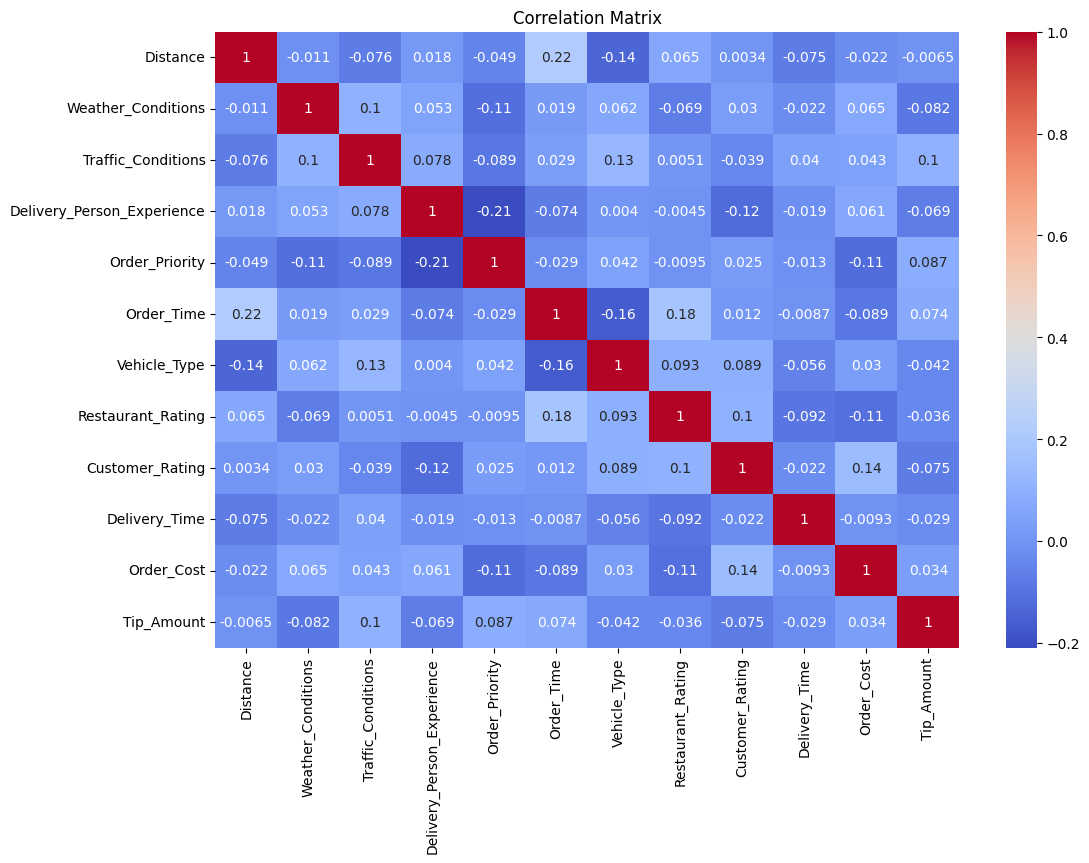

In [8]:
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

### 🧐 Outlier Detection

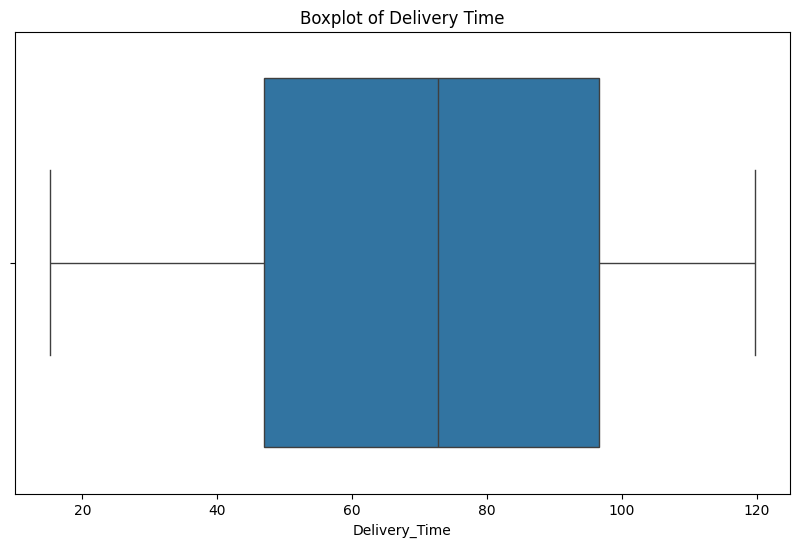

In [9]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Delivery_Time'])
plt.title('Boxplot of Delivery Time')
plt.show()

## 🧪 Feature Engineering

In [10]:
# Create binary label for Logistic Regression
df['Delivery_Status'] = df['Delivery_Time'].apply(lambda x: 1 if x > 30 else 0)  # 1=Delayed, 0=Fast

# Optional Time Feature
df['Is_Rush_Hour'] = df['Order_Time'].apply(lambda x: 1 if x in [1, 2] else 0)  # Evening/Night
df.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount,Delivery_Status,Is_Rush_Hour
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",-1.454738,1,2,4,2,0,2,0.515500,-0.987317,26.22,0.501852,1.192403,0,0
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",1.439192,0,2,8,1,3,2,1.085900,0.738511,62.61,-1.634294,-0.600810,1,0
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",-0.666417,2,2,9,0,3,1,-0.625302,-0.412041,48.43,1.092646,0.599332,1,0
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",0.335835,0,1,2,2,1,1,-0.767902,0.019416,111.63,-0.923323,1.113532,1,1
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",-0.700119,1,0,6,1,3,1,-0.340101,-1.274955,32.38,-0.779755,-1.511757,1,0


## 🤖 Phase 2: Predictive Modeling

### 🔀 Train-Test Split

In [11]:
X = df[['Distance', 'Traffic_Conditions', 'Order_Priority', 'Order_Cost', 'Tip_Amount']]
y = df['Delivery_Time']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 📏 Linear Regression

In [12]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

MSE: 929.6849948864067
R²: -0.005183080345008362
MAE: 25.364683705144916


### ✅ Logistic Regression (Fast/Delayed Classification)

Accuracy: 0.85
Precision: 0.85
Recall: 1.0
F1-score: 0.918918918918919


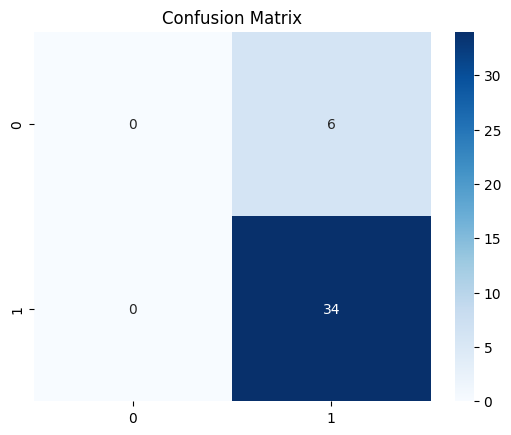

In [13]:
X_class = df[['Traffic_Conditions', 'Weather_Conditions', 'Delivery_Person_Experience', 'Is_Rush_Hour']]
y_class = df['Delivery_Status']
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

logr = LogisticRegression()
logr.fit(Xc_train, yc_train)
yc_pred = logr.predict(Xc_test)

print("Accuracy:", accuracy_score(yc_test, yc_pred))
print("Precision:", precision_score(yc_test, yc_pred))
print("Recall:", recall_score(yc_test, yc_pred))
print("F1-score:", f1_score(yc_test, yc_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(yc_test, yc_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

### 📉 ROC Curve

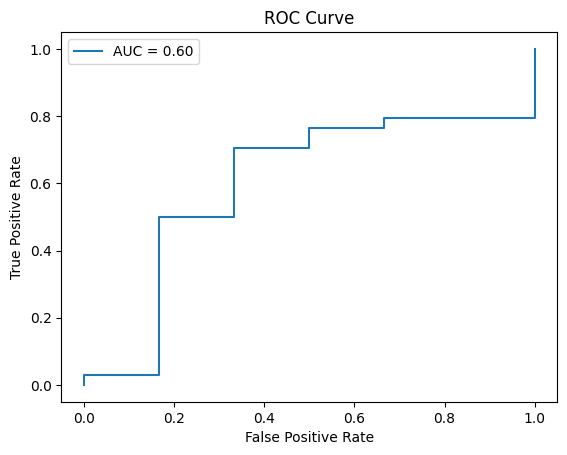

In [14]:
y_probs = logr.predict_proba(Xc_test)[:,1]
fpr, tpr, _ = roc_curve(yc_test, y_probs)
plt.plot(fpr, tpr, label=f"AUC = {auc(fpr, tpr):.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

## 📝 Final Report

### 📌 Dataset Description & Preprocessing
- Cleaned missing values.
- Encoded categorical variables.
- Normalized numerical columns.
- Created rush hour and binary delivery status features.

### 📊 Model Evaluation & Comparison
- **Linear Regression:** Predicted exact delivery times.
- **Logistic Regression:** Classified deliveries as fast/delayed.

### 🚀 Actionable Insights
- Improve accuracy by optimizing rush-hour scheduling.
- Provide delivery training for low-experience personnel.
- Adjust for traffic patterns and weather effects on deliveries.

---
